In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

**Importing the dataset**

In [4]:
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


we can drop User ID column as it won't affect in classification

In [5]:
dataset.drop('User ID',axis=1,inplace=True)

In [6]:
def encode(v):
    if v=='Male':
        return 1
    else:
        return 0

In [7]:
dataset['Gender']=dataset['Gender'].apply(encode)

In [8]:
dataset

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [9]:
X=dataset.drop('Purchased',axis=1)

In [10]:
Y=dataset['Purchased']

**Splitting the dataset into the Training set and Test set**

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=25)

**Feature Scaling**

In [12]:
scaler=StandardScaler()

In [13]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [14]:
knn=KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

**Predicting the Test set results**

In [16]:
Y_pred=knn.predict(X_test)

**Making the Confusion Matrix**

In [18]:
cm=confusion_matrix(Y_test,Y_pred)
report=classification_report(Y_test,Y_pred)
print('confusion matrix is','\n',cm)
print('classification report is','\n',report)

confusion matrix is 
 [[70  7]
 [12 31]]
classification report is 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88        77
           1       0.82      0.72      0.77        43

    accuracy                           0.84       120
   macro avg       0.83      0.82      0.82       120
weighted avg       0.84      0.84      0.84       120



### choosing K value

In [19]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=Y_test))

Text(0.5, 1.0, 'K Vs error_rate')

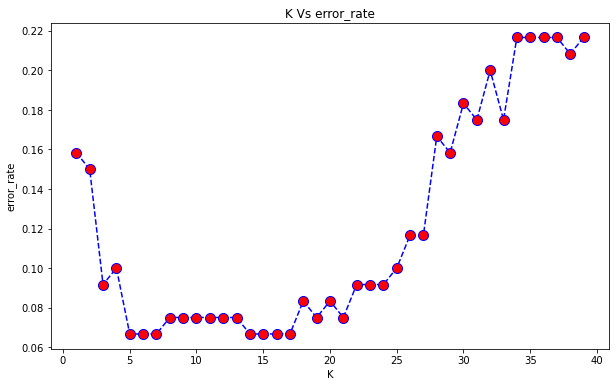

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',marker='o',linestyle='dashed',markerfacecolor='red',markersize=10)
plt.xlabel('K')
plt.ylabel('error_rate')
plt.title('K Vs error_rate')

from the above graph we can choose k value as 17 as error is minimal.

In [21]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[74  3]
 [ 5 38]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        77
           1       0.93      0.88      0.90        43

    accuracy                           0.93       120
   macro avg       0.93      0.92      0.93       120
weighted avg       0.93      0.93      0.93       120

